In [2]:
import numpy as np
import pandas as pd

### CREATE THE DATA SET ###

In [9]:
np.random.seed(42)
num_loans = 1000
# Générer un portefeuille diversifié
ratings = np.random.choice(['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC'], size=num_loans, 
                            p=[0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05])
# Les montants suivent une distribution log-normale
loan_amounts = np.random.lognormal(mean=11, sigma=1, size=num_loans)
# Créer le DataFrame des prêts
loans_df = pd.DataFrame({
    'amount': loan_amounts,
    'rating': ratings
})
loans_df.head()

,amount,rating
0,71517.753670,BBB
1,15750.944982,CCC
2,87570.358905,BB
3,110258.815058,BBB
4,104798.050430,A


### SETTING UP THE SCENARIO ###

In [12]:
# Paramètres de la simulation
pd_mean = 0.05  # 5% probabilité de défaut moyenne
pd_std = 0.01   # écart-type
lgd_mean = 0.45 # 45% perte moyenne en cas de défaut
lgd_std = 0.1   # écart-type
correlation = 0.2  # corrélation entre les défauts

In [13]:
import credit_risk as cr 

In [14]:
# Créer et exécuter la simulation
sim = cr.CreditRiskMonteCarlo(loans_df, pd_mean, pd_std, lgd_mean, lgd_std, correlation)
results = sim.simulate_defaults(10000)  # 10,000 simulations

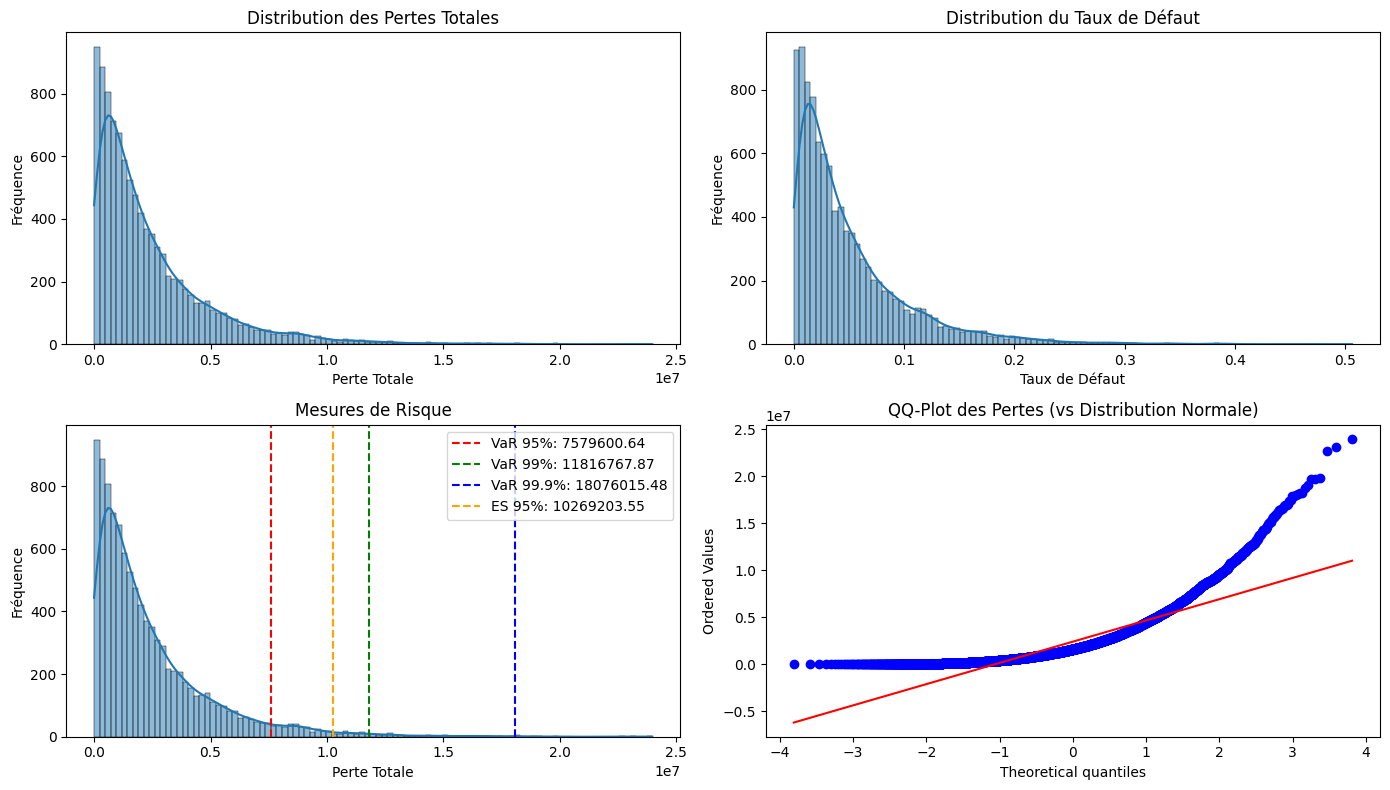

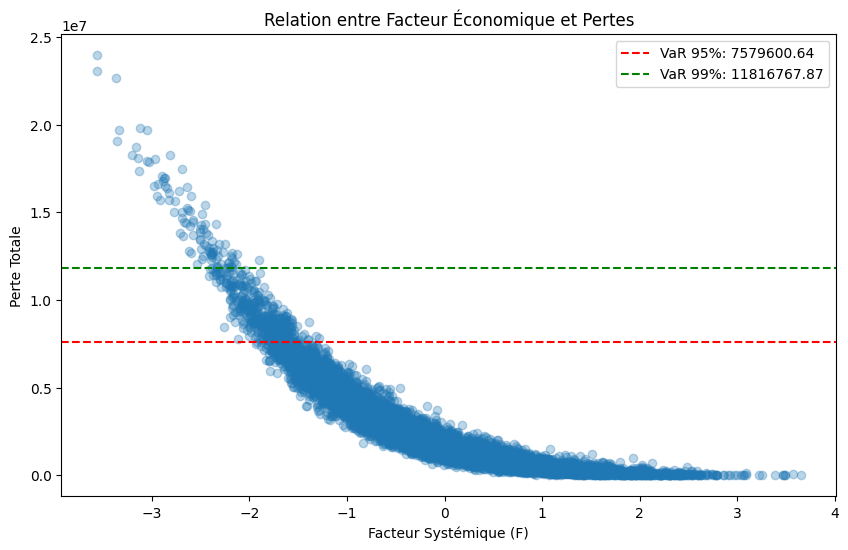


Résultats de la simulation:
VaR_95: 7,579,600.64
VaR_99: 11,816,767.87
VaR_999: 18,076,015.48
ES_95: 10,269,203.55
mean_loss: 2,411,571.05
max_loss: 23,966,944.81
mean_default_rate: 0.05


In [16]:
# Afficher les résultats
risk_metrics = sim.plot_loss_distribution()
print("\nRésultats de la simulation:")
for metric, value in risk_metrics.items():
    print(f"{metric}: {value:,.2f}")


Exécution du stress testing...


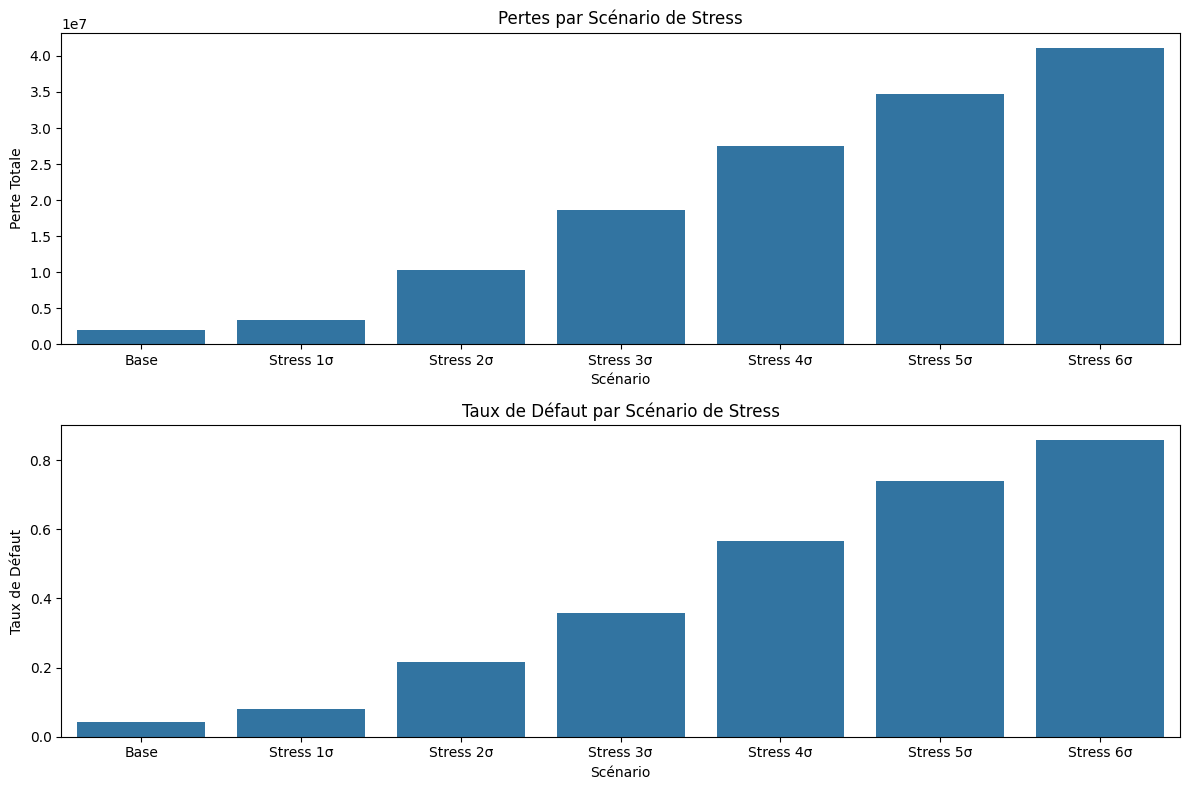


Résultats du stress testing:
    Scénario  Facteur systémique  Perte totale  Taux de défaut
0       Base                   0  1.962651e+06           0.042
1  Stress 1σ                  -1  3.378738e+06           0.079
2  Stress 2σ                  -2  1.028438e+07           0.217
3  Stress 3σ                  -3  1.860576e+07           0.359
4  Stress 4σ                  -4  2.749654e+07           0.566
5  Stress 5σ                  -5  3.478341e+07           0.739
6  Stress 6σ                  -6  4.114950e+07           0.858


In [18]:
# Exécuter le stress testing
print("\nExécution du stress testing...")
stress_results = sim.run_stress_testing(stress_levels=[-1, -2, -3, -4, -5, -6])
print("\nRésultats du stress testing:")
print(stress_results)